## Data Bootcamp:  Examples

Introductory examples for [Data Bootcamp](https://github.com/DaveBackus/Data_Bootcamp#data-bootcamp), a course at NYU's Stern School of Business. The course is designed to introduce students to economic and financial data and the Python tools to work with it effectively. The code that follows will be obscure if you're new to Python, but you will be able to do all of this and more by the end of the course.   

### Examples 

* World GDP 
* US GDP growth (data from FRED)
* Chinese economic indicators (FRED) 
* US economic indicators (FRED) 
* US labor market conditions (Beveridge curve) (FRED) 
* Government debt (WEO) (Greece, US, Japan, ??) 
* GDP per capita in emerging market economies (World Bank) 
* Emerging market indicators (World Bank?) 
* Stock prices and returns (Yahoo?) 
* Demographics 
* Fama-French equity "factors" (data from Ken French's website)
* S&P 500 ETF (Spyders) (Yahoo finance) 


Written by Dave Backus.  A product of the #nyuecon NYU Python Factory at NYU's Stern School of Business 

###  Preliminaries

In [196]:
# checks 
# anything after a hash (#) is a comment 
import datetime as dt 
import sys
print('Today is: ', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

Today is:  2015-08-31
What version of Python are we running? 
3.4.1 |Anaconda 2.3.0 (64-bit)| (default, Jun 11 2014, 17:27:11) [MSC v.1600 64 bit (AMD64)]


In [181]:
# This is an IPython command: it says to put plots here in the notebook, rather than open separate windows.
%matplotlib inline

### Example 1:  Comparing countries by GDP and GDP per capita

**GDP** is the total value of output produced in a country.  **GDP per capita** is the per person version:  GDP divided by the population.  Both are expressed in 2011 US dollars with an adjustment for the cost of living.  They come from the World Bank's *World Development Indicators*, a great source of information about economic and social conditions around the world.  See the World Bank's [data catalog](http://datacatalog.worldbank.org/).

For more information about accessing World Bank data in Python, see the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/remote_data.html#remote-data-wb). 

In [182]:
# load packages (redundancy is ok)
import pandas as pd                # data management tools 
from pandas.io import wb           # World Bank api 
import matplotlib.pyplot as plt    # plotting tools 

In [183]:
# look for variable codes  
wb.search('gdp.*capita.*const').iloc[:,:2]

,id,name
686,6.0.GDP_usd,GDP (constant 2005 $)
687,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
4369,EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2011 PPP ...
4377,EG.USE.COMM.GD.PP.KD,"Energy use (kg of oil equivalent) per $1,000 G..."
4711,GDPPCKD,"GDP per Capita, constant US$, millions"
6484,NA.GDP.AGR.KR,"GDP on Agriculture Sector (in IDR Million), Co..."
6485,NA.GDP.CNST.CR,"GDP on Construction Sector (in IDR Million), C..."
6486,NA.GDP.CNST.KR,"GDP on Construction Sector (in IDR Million), C..."
6488,NA.GDP.EXC.OG.KR,Total GDP excluding Oil and Gas (in IDR Millio...
6490,NA.GDP.FINS.KR,GDP on Financial Service Sector (in IDR Millio...


In [184]:
# read data from World Bank 
var = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.MKTP.PP.KD']          # variable list 
iso  = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']  # country list (ISO codes)
year = 2014 
df = wb.download(indicator=var, country=iso, start=year, end=year)
df

,,NY.GDP.PCAP.PP.KD,NY.GDP.MKTP.PP.KD
country,year,,
Brazil,2014,15412.287902,3.113801e+12
China,2014,12608.876430,1.720191e+13
France,2014,37217.533782,2.463852e+12
India,2014,5565.053876,7.053160e+12
Japan,2014,35634.978250,4.530339e+12
Mexico,2014,16495.801721,2.042167e+12
United States,2014,52117.759675,1.661812e+13


In [185]:
# massage data 
df = df.reset_index(level='year', drop=True)
df.columns = ['gdppc', 'gdp']
df['gdp'] = df['gdp']/10**12           # convert to trillions
df['gdppc'] = df['gdppc']/10**3        # convert to thousands 
df['order'] = [5, 3, 1, 4, 2, 6, 0]    # reorder countries 
df = df.sort(columns='order', ascending=False)

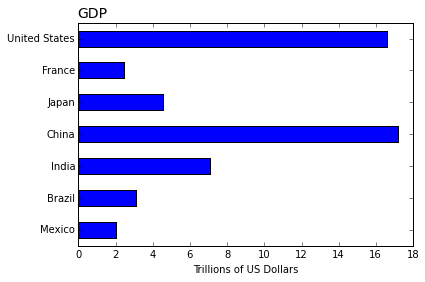

In [186]:
ax = df['gdp'].plot(kind='barh')
ax.set_title('GDP', loc='left', fontsize=14)
ax.set_xlabel('Trillions of US Dollars')
ax.set_ylabel('')

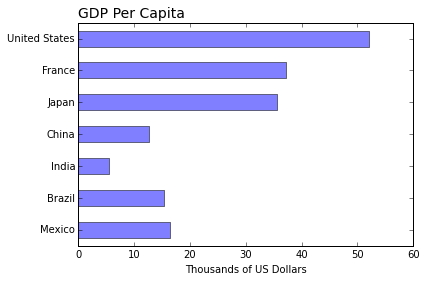

In [187]:
ax = df['gdppc'].plot(kind='barh', alpha=0.5) 
ax.set_title('GDP Per Capita', loc='left', fontsize=14)
ax.set_xlabel('Thousands of US Dollars')
ax.set_ylabel('')

### Open questions  

* Why such large differences between countries?
* What other country indicators would you like to see?
* How would you improve these graphs?

### Example 2:  US economic conditions 

Fluctuations...  Investors -- and others -- keep a close eye on the state of the economy because it affects the performance and value of firms.  We'll go into this more extensively later, but for now we want to see what the economy has done in the past, especially the recent past.  We use the St Louis Fed's [FRED database](https://research.stlouisfed.org/fred2/) (Federal Reserve Economic Data), one of the best sources of macroeconomic data.  

For more information about accessing FRED data in Python, see the [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/remote_data.html#remote-data-fred). 

In [215]:
# get data from FRED
fred_series = ["GDPC1"]
start_date = dt.datetime(1960, 1, 1)
fred = web.DataReader(fred_series, "fred", start_date)/10**3

              GDPC1
DATE               
2014-10-01  16.1514
2015-01-01  16.1773
2015-04-01  16.3243


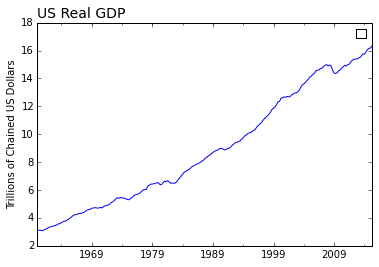

In [222]:
# print last 3 data points to see what we've got 
# note:  quarterly data 
print(fred.tail(3))  
# plot 
ax = fred.plot(legend=False)
ax.set_title('US Real GDP', fontsize=14, loc='left')
ax.set_xlabel('')
ax.set_ylabel('Trillions of Chained US Dollars')
ax.legend('')

In [224]:
# compute quarterly growth rates 
g = 400*fred.pct_change()           # 400 makes this an annual percentage  
print(g.tail(5))
# change label   
g.columns = ['US GDP Growth']

               GDPC1
DATE                
2014-04-01  4.492238
2014-07-01  4.208408
2014-10-01  2.056159
2015-01-01  0.641430
2015-04-01  3.634723


In [211]:
# get mean and standard deviation 
gmean = g.mean()
gstd  = g.std() 

In [231]:
g[DATE>=(1990, 1, 1)].plot(kind='bar')

NameError: name 'DATE' is not defined

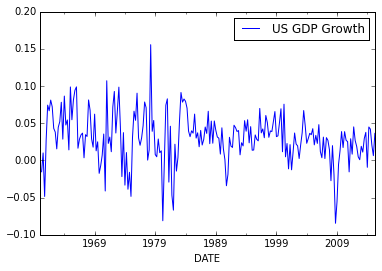

In [209]:
# simple plot 
# note the financial crisis:  GDP fell 8% one quarter (annual rate, so really 2%)
ax = g.plot() 

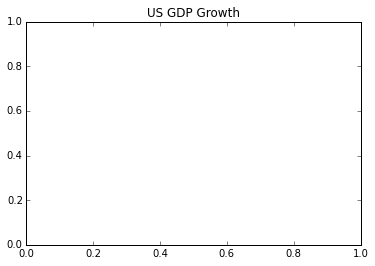

In [193]:
# fix up plot
plt.title('US GDP Growth')
#plt.show() 

In [194]:
# more complex plot, bar chart for last 6 quarters
# put mean 

---

### Example 2: Fama-French equity "factors"

Gene Fama and Ken French are two of the leading academics studying (primarily) equity returns.  Some of this work is summarized in the [press release](http://www.nobelprize.org/nobel_prizes/economic-sciences/laureates/2013/press.html) and related material for the 2013 Nobel Prize in economics, which was shared by Fama with Lars Hansen and Robert Shiller.  For now, it's enough to say that Ken French posts an extensive collection of equity data on his website.  

We'll look at what have come to be called the Fama-French factors.  The data includes:

* xsm:  the return on the market (aggregate equity) minus the riskfree rate
* smb (small minus big):  the return on small firms minus the return on big firms 
* hml (high minus low):  the return on firms with high book-to-market ratios minus those with low ratios. 
* rf:  the riskfree rate.

We download all of these at once, monthly from 1926.  Each is reported as a percentage.
Since they're monthly, you can get a rough annual number if you multiply by 12. 

**Question(s).** 
The question we address is how the returns compare:  their means, their variability, and so on.  
[Ask yourself:  how would I answer this?  What would I like to do with the data?]

References

* http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
* http://quant-econ.net/pandas.html
* http://pandas.pydata.org/pandas-docs/dev/remote_data.html#fama-french
* http://pandas.pydata.org/pandas-docs/stable/10min.html#selection 
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot
* http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.hist.html 

---

In [195]:
# load packages (if it's redundant it'll be ignored)
import pandas.io.data as web      

# read data from Ken French's website 
ff = web.DataReader('F-F_Research_Data_Factors', 'famafrench')[0] 
# NB:  ff.xs is a conflict, rename to xsm  
ff.columns = ['xsm', 'smb', 'hml', 'rf']

# see what we've got
print(ff.head(3))
print(ff.describe())

HTTPError: HTTP Error 404: Not Found

In [ ]:
# compute and print summary stats 
moments = [ff.mean(), ff.std(), ff.skew(), ff.kurtosis() - 3]

# \n here is a line break
print('Summary stats for Fama-French factors (mean, std, skew, ex kurt)') #, end='\n\n') 
print(moments)
#[print(moment, end='\n\n') for moment in moments]

In [ ]:
# try some things yourself 
# like what?  type ff.[tab]
import pandas as pd
pd.__version__


In [ ]:
# some plots 
ff.plot()
plt.show()

ff.hist(bins=50, sharex=True)
plt.show()

ff.boxplot(whis=0, return_type='axes')
plt.show()

**Answer(s)?**  Aren't the boxplots in the last figure cool?  The histograms above them?  What do you see in them?  How do the various returns compare?   

---

### Example 3: GDP per capita and life expectancy

The World Bank collects a broad range of economic and social indicators for most countries in the World.  They also have a nice interface.  It's a good source for basic information about the economic climate compares across countries.  

We illustrate its usefulness with a scatterplot of life expectancy v GDP per capita.  

**Question(s).**  How closely are these two indicators of quality of life are related.  

**References**

* http://data.worldbank.org/
* http://pandas.pydata.org/pandas-docs/stable/remote_data.html#world-bank
* http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html

---

In [ ]:
# load package under name wb 
from pandas.io import wb

# find the codes for the variables of interest 
wb.search
wb.search(string='gdp.*capita').iloc[:2]

In [ ]:
# specify dates, variables, and countries 
start = 2011
# GDP per capita, population, life expectancy
variable_list = ['NY.GDP.PCAP.KD', 'SP.POP.TOTL', 'SP.DYN.LE00.IN']
country_list  = ['US', 'FR', 'JP', 'CN', 'IN', 'BR', 'MX'] 

# Python understands we need to go to the second line because ( hasn't been closed by )
data = wb.download(indicator=variable_list, 
                   country=country_list, start=start, end=start).dropna()

# see what we've got
print(data)

In [ ]:
# check the column labels, change to something simpler 
print(data.columns)
data.columns = ['gdppc', 'pop', 'le']
print(data)

In [ ]:
# scatterplot
# life expectancy v GDP per capita 
# size of circles controlled by population 

# load packages (ignored if redundant) 
import numpy as np            
import matplotlib.pyplot as plt

plt.scatter(data['gdppc'], data['le'], s=0.000001*data['pop'], alpha=0.5)
plt.ylabel('Life Expectancy')
plt.xlabel('GDP Per Capita')
plt.show()

In [ ]:
# Note:  size of circles based on population 

---

### Example 4: Option prices

A financial option gives its owner the right to buy or sell an asset (the "underlying") at a preset price (the "strike") by a specific date (the "expiration date").  Puts are options to sell, calls are options to buy.  We explore option prices with Yahoo Finance, specifically options on the S&P 500 exchange-traded fund, ticker SPY.  

We illustrate its usefulness with a scatterplot of life expectancy v GDP per capita.  

**Question(s).**  How do put and call prices vary with their strike price?  [Think about this.  What would you expect?] 

**Warning.** This won't work in Python 2.7 or, in fact, in any environment that uses versions of Pandas prior to 0.14.1.  The Yahoo Option API is labeled experimental and it seems the earlier versions don't allow easy access to the strike prices.  

**References**

* http://finance.yahoo.com/q/op?s=SPY+Options
* http://pandas.pydata.org/pandas-docs/stable/remote_data.html#yahoo-finance
* http://pandas.pydata.org/pandas-docs/stable/remote_data.html#yahoo-finance-options

---

In [ ]:
# load packages 
import pandas as pd 
import pandas.io.data as web
from pandas.io.data import Options
import datetime as dt 
import matplotlib.pylab as plt

# ticker 
ticker = 'spy' 

In [ ]:
# load stock price first (the underlying) 
# pick a recent date and subtract seven days to be sure we get a quote  
# http://pymotw.com/2/datetime/#date-arithmetic
today = dt.date.today()
one_week = dt.timedelta(days=7)
start = today - one_week
stock = web.DataReader(ticker, 'yahoo', start) 
print(stock)        # just to see what we have

# take the last close (-1 is the last, 'Close' is the close)
# this shows up in our figure 
atm = stock.ix[-1,'Close']      # the -1 takes the last observation   

In [ ]:
# get option prices for same ticker 
option = Options(ticker, 'yahoo')
expiry = dt.date(2014, 11, 20)
data_calls = option.get_call_data(expiry=expiry).dropna()
data_puts  = option.get_put_data(expiry=expiry).dropna()

# check what we have 
print(data_calls.index) 
print(data_calls.tail())

In [ ]:
# compute mid of bid and ask and arrange series for plotting 
calls_bid = data_calls['Bid']
calls_ask = data_calls['Ask'] 

calls_strikes = data_calls['Strike']
calls_mid = (data_calls['Bid'] + data_calls['Ask'])/2
puts_strikes = data_puts['Strike']
puts_mid = (data_puts['Bid'] + data_puts['Ask'])/2

*Note to self.* 
In older versions of Pandas, prior to 0.14.1, the option input puts the strike in the index, not as a column of data.
The next two lines check the versions of pandas and python on the off chance we want to check:  print(pd.__version__), 
! python --version 

In [ ]:
# plot call and put prices v strike 
plt.plot(calls_strikes, calls_mid, 'r', lw=2, label='calls')
plt.plot(puts_strikes, puts_mid, 'b', lw=2, label='puts')

# prettify it 
#plt.axis([120, 250, 0, 50])
plt.axvline(x=atm, color='k', linestyle='--', label='ATM')               
plt.legend(loc='best')
plt.show()

In [ ]:
# rerun the figure above with different color lines.  Or dashed lines for call and put prices.  
# or change the form of the vertical ATM line:  solid? another color?  
